Calculated peak:  2.879518072289157e-05[T] 
Tabular value:  1.74864e-05[T]


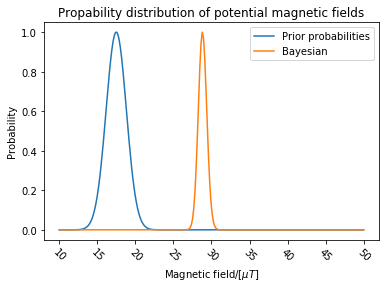

In [135]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#a = 
mu0 = 4*np.pi*10e-7

angles = np.concatenate(np.genfromtxt('theta_obs.csv', delimiter=',', skip_header=1)[0:, 1:])
true_angles = np.concatenate(np.genfromtxt('theta_true.csv',  delimiter=',', skip_header=1))

tabelværdi = 17486.4e-9
standard_deviation = 1330e-9
måleusikkerhed = 3
x_axis = np.linspace(10000,50000,250)*1e-9
normal = lambda val, mean, standard: norm.pdf(val, loc = mean, scale = standard)

P_be = lambda x: normal(x,tabelværdi,standard_deviation)

#Lab3
def B(z,I,N,a):
    return 4*np.pi*1e-7*I*N*a**2/(2*(a**2+z**2)**(3/2))

radius = np.array([0.052,0.068,0.086,0.101,0.101,0.101,0.101])
current = np.array([1.970,1.965,1.964,1.962,1.962,1.960,1.962])
vinding = np.array([1,1,1,1,2,3,4])
Z = np.array([0.00,0.03,0.05,0.07,0.09,0.10])

Be = x_axis
data = []

for index in range(len(radius)):
    vinkler = []
    for højde in Z:
        induced = B(højde,current[index],vinding[index],radius[index])
        vinkel = np.arctan(induced/Be)*180/(np.pi)
        vinkler.append(vinkel)
    #print(vinkler)
    data.append(vinkler)

#\Lab3
data = np.array(data)
true_vinkel = np.concatenate(data, axis = 0)
    

P = []
for i in range(len(angles)):
    liste = []
    for j in range(len(true_vinkel[i])):
        liste.append(normal(angles[i],true_vinkel[i,j],måleusikkerhed))        
    P.append(liste)

P_x = np.product(P, axis = 0)    
P_x_2 = P_be(x_axis)
y_axis = P_x * P_x_2

plt.plot(x_axis*1e6,P_x_2/max(P_x_2), label = "Prior probabilities")
plt.plot(x_axis*1e6,y_axis/max(y_axis), label = "Bayesian")
plt.xlabel("Magnetic field/[$\mu T$]")
plt.ylabel("Probability")
plt.title("Propability distribution of potential magnetic fields")
plt.tick_params(axis ='x', rotation = -45)
plt.legend()
print("Calculated peak: ", str(x_axis[np.argmax(y_axis)]) + "[T]","\nTabular value: ", str(tabelværdi) + "[T]")


